In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import cv2

In [ ]:
pip install chatterbot

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 1.3 MB 12.0 MB/s 
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.31
    Uninstalling SQLAlchemy-1.4.31:
      Successfully uninstalled SQLAlchemy-1.4.31


In [ ]:
pip install chatterbot_corpus

     |████████████████████████████████| 117 kB 5.3 MB/s 


In [ ]:
pip install spacy

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from chatterbot import ChatBot

In [ ]:
# Read
base_dir = "/content/drive/MyDrive/Hackathon/Car Damage Detection/data1a"
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_damage_dir = os.path.join(train_dir, '00-damage')
train_whole_dir = os.path.join(train_dir, '01-whole')
validation_damage_dir = os.path.join(validation_dir, '00-damage')
validation_whole_dir = os.path.join(validation_dir, '01-whole')

In [ ]:
num_damage_tr = len(os.listdir(train_damage_dir))
num_whole_tr = len(os.listdir(train_whole_dir))
num_damage_val = len(os.listdir(validation_damage_dir))
num_whole_val = len(os.listdir(validation_whole_dir))
total_train = num_damage_tr + num_whole_tr
total_val = num_damage_val + num_whole_val

In [ ]:
print('Total training damaged car images:', num_damage_tr)
print('total training whole car images:', num_whole_tr)
print('Total validation damaged car images:', num_damage_val)
print('total validation whole car images:', num_whole_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

Total training damaged car images: 930
total training whole car images: 920
Total validation damaged car images: 230
total validation whole car images: 230
--
Total training images: 1850
Total validation images: 460


In [ ]:
batch_size = 15
epochs = 6
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
directory=train_dir, shuffle=True, target_size=(IMG_HEIGHT, IMG_WIDTH),
class_mode='binary')

Found 1850 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
directory=validation_dir,target_size=(IMG_HEIGHT, IMG_WIDTH),class_mode='binary')

Found 460 images belonging to 2 classes.


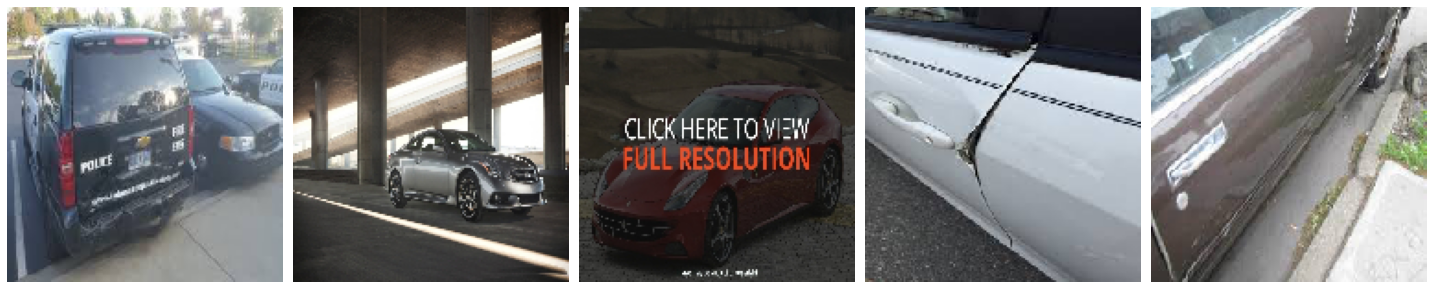

In [ ]:
sample_training_images, _ = next(train_data_gen)
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip( images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()
plotImages(sample_training_images[:5])

In [ ]:
base_model = VGG16(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Flatten the output layer to 1 dimension
x = Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(
    train_data_gen, steps_per_epoch = total_train // batch_size,
    epochs = epochs, validation_data = val_data_gen,
    validation_steps = total_val // batch_size
)

Epoch 1/6
123/123 [==============================] - 372s 3s/step - loss: 0.4557 - accuracy: 0.7978 - val_loss: 0.3811 - val_accuracy: 0.8378
Epoch 2/6
123/123 [==============================] - 19s 155ms/step - loss: 0.3305 - accuracy: 0.8665 - val_loss: 0.2974 - val_accuracy: 0.8733
Epoch 3/6
123/123 [==============================] - 19s 155ms/step - loss: 0.2719 - accuracy: 0.8894 - val_loss: 0.2911 - val_accuracy: 0.8822
Epoch 4/6
123/123 [==============================] - 19s 153ms/step - loss: 0.2307 - accuracy: 0.9041 - val_loss: 0.2884 - val_accuracy: 0.8822
Epoch 5/6
123/123 [==============================] - 19s 155ms/step - loss: 0.1968 - accuracy: 0.9166 - val_loss: 0.2731 - val_accuracy: 0.8956
Epoch 6/6
123/123 [==============================] - 19s 154ms/step - loss: 0.1755 - accuracy: 0.9232 - val_loss: 0.3007 - val_accuracy: 0.8867


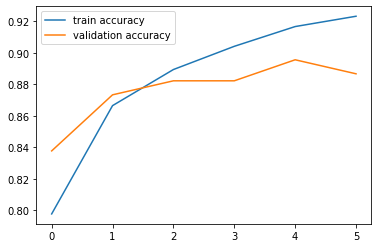

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

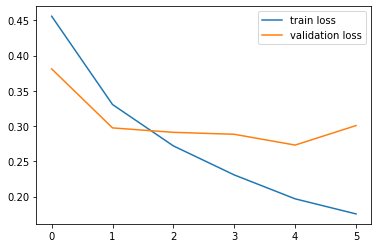

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

In [ ]:
def predictImage(filename):

    img = image.load_img(filename,target_size=(150,150))
    plt.imshow(img)

    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val < 0.5:
        plt.xlabel("Car Damaged",fontsize=30)
    elif val >= 0.5:
        plt.xlabel("Car Not Damaged",fontsize=30)

[[0.]]


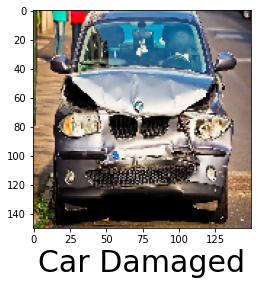

In [ ]:
predictImage(os.path.join(validation_dir, 'sample_damaged.jpeg'))

[[1.]]


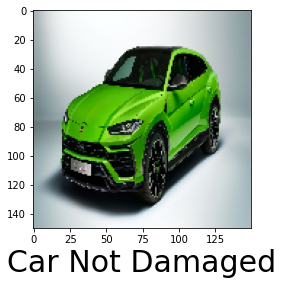

In [ ]:
predictImage(os.path.join(validation_dir, 'sample_whole.jpg'))

[[1.]]


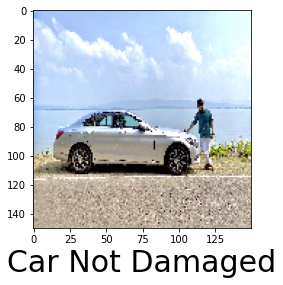

In [ ]:
predictImage(os.path.join(validation_dir, 'sample_whole_2.jpg'))

[[0.]]


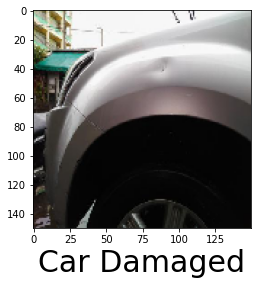

In [ ]:
predictImage(os.path.join(validation_dir, 'sample_damaged_2.jpg'))

[[1.]]


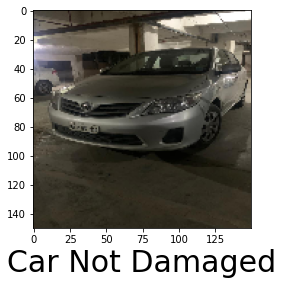

In [ ]:
predictImage(os.path.join(validation_dir, 'sample_whole_3.jpg'))

In [ ]:
layer_names = [layer.name for layer in model.layers]

In [ ]:
layer_outputs = [layer.output for layer in model.layers]

In [ ]:
from keras.models import Model
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(sample_training_images[10].reshape(1,150,150,3))

def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

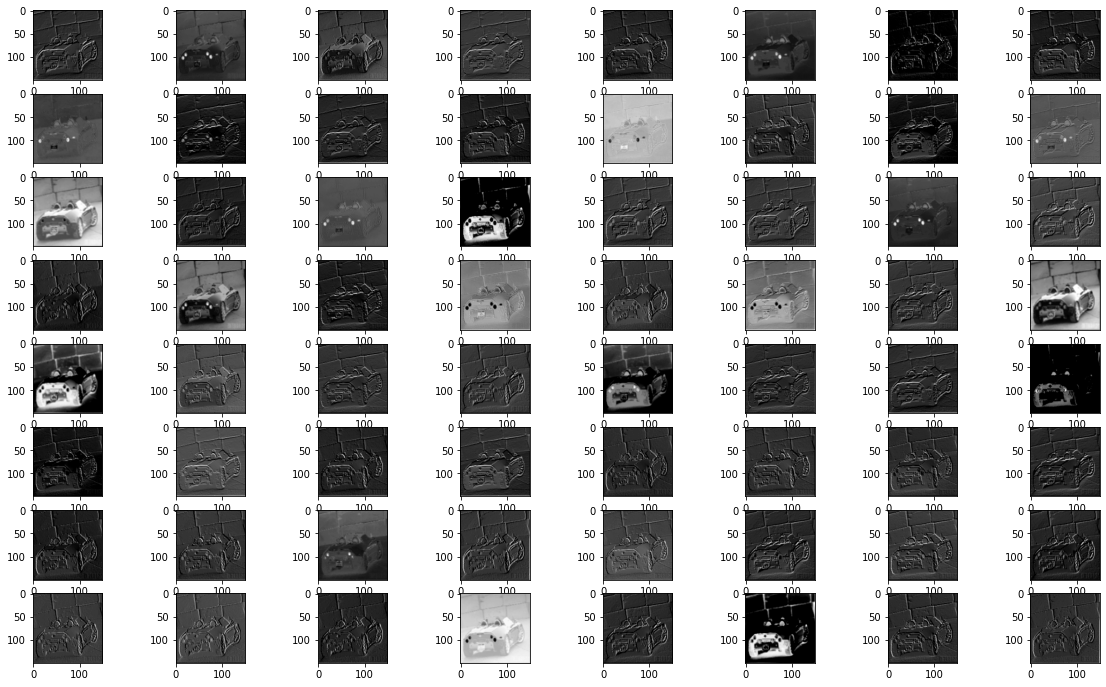

In [ ]:
display_activation(activations, 8, 8, 1)

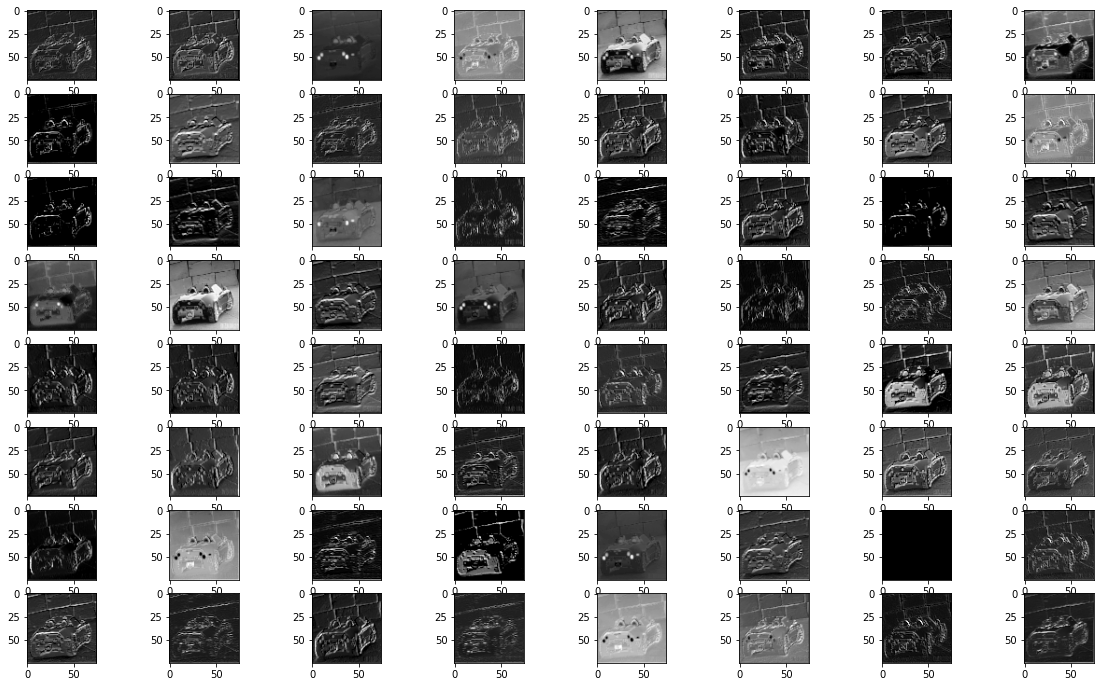

In [ ]:
display_activation(activations, 8, 8, 3)

In [ ]:
bot = ChatBot('Buddy', read_only = True)

In [ ]:
from chatterbot.trainers import ListTrainer
trainer = ListTrainer(bot)
trainer.train([
    "Hi, can I help you",
    "Who are you?",
    "I am your virtual assistant. Ask me any questions...",
    "Where do you operate from?",
    "We operate from the USA",
    "Can you detect if my car is damaged?",
    "Yes I can detect any damages in cars and notify the insurance company with the results",
    "I would like to speak or contact your developers",
    "They are currently busy with their final project presentation. Please try again later",
    "I want to upload an image to check any damages",
    "Sure. Please enter 'input' to check for any damage"

])
trainer.train([
    "Which types of cars can you detect damages for?",
    "I will predict damages for all types of cars",
    "Tell me something about your developers",
    "They are students from JHU"

])
trainer.train([
    "Could you give me the contact details of the insurance office in Washington DC?",
    "Sure. The contact details are: Ph no. 2028987656, Address: 1221, Dupont Circle, Washington DC",
    "I need help",
    "Can you tell me more about your vehicle?",
    "It might be damaged and I want to check if I can claim my insurance",
    "Sure. Please enter 'input' to check for any damage. If it is detected as damaged, you can claim your insurance"

])
trainer.train([
    "What is the minimum coverage for your insurance",
    "$100,000. Costs are determined by the amount of damage and various other factors",
    "What are the payment options available?",
    "We have multiple payment options available. You can choose monthly, annual and even semi annual payments."
])
trainer.train([
    "Which is your favorite class?",
    "My favorite is definitely the Deep Learning with Unstructured Data class since I was built using the knowledge my developers gained from this class"
])

List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%


In [ ]:
from chatterbot.trainers import ChatterBotCorpusTrainer
trainer = ChatterBotCorpusTrainer(bot)
trainer.train('chatterbot.corpus.english')

Training ai.yml: [####################] 100%
Training botprofile.yml: [####################] 100%
Training computers.yml: [####################] 100%
Training conversations.yml: [####################] 100%
Training emotion.yml: [####################] 100%
Training food.yml: [####################] 100%
Training gossip.yml: [####################] 100%
Training greetings.yml: [####################] 100%
Training health.yml: [####################] 100%
Training history.yml: [####################] 100%
Training humor.yml: [####################] 100%
Training literature.yml: [####################] 100%
Training money.yml: [####################] 100%
Training movies.yml: [####################] 100%
Training politics.yml: [####################] 100%
Training psychology.yml: [####################] 100%
Training science.yml: [####################] 100%
Training sports.yml: [####################] 100%
Training trivia.yml: [####################] 100%


In [ ]:
bot = ChatBot('Buddy',
             read_only = True,
             preprocessors=['chatterbot.preprocessors.clean_whitespace',                            'chatterbot.preprocessors.unescape_html',                          'chatterbot.preprocessors.convert_to_ascii'])

In [ ]:
bot = ChatBot('Buddy',
             logic_adapters = [
                 {
                     'import_path': 'chatterbot.logic.BestMatch',
                     'default_response': 'I am sorry, I do not understand. I am still learning. Please contact abc@xxx.com for further assistance.',
                     'maximum_similarity_threshold': 0.40
                 }
             ],
             read_only = True,
             preprocessors=['chatterbot.preprocessors.clean_whitespace',
'chatterbot.preprocessors.unescape_html',
'chatterbot.preprocessors.convert_to_ascii'])

In [ ]:
def predictImageForChatBot(filename):

    img = image.load_img(filename,target_size=(150,150))
    plt.imshow(img)

    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val < 0.5:
        plt.xlabel("Car Damaged",fontsize=30)
    elif val >= 0.5:
        plt.xlabel("Car Not Damaged",fontsize=30)
    plt.draw()
    plt.pause(0.1)

In [ ]:
def inputImage():
  try:
    i = input('Bot: Enter the name of your image. If you don\'t want to upload an image please enter exit.')
    if i.lower() != 'exit':
      predictImageForChatBot(os.path.join(validation_dir, i))
    else:
      print('Bot: How can I be of service?')
      pass
  except FileNotFoundError:
    print('Bot: Invalid image name entered. Please try again.')
    inputImage()

In [ ]:
def chatbot_talk():
  while True:

      request = input(name+':')

      if request.lower() == 'input':
          inputImage()
      elif request.lower() == 'bye':
          print('Bot: Bye. Have a good day!')
          break

      else:
          response=bot.get_response(request)
          print('Bot: ', response)

Enter Your Name: Tanush
Welcome to Chatbot Service! Let me know how can I help you
Tanush:Who are you?
Bot:  I am your virtual assistant. Ask me any questions...
Tanush:Can you detect if my car is damaged?
Bot:  Yes I can detect any damages in cars and notify the insurance company with the results
Tanush:I want to upload an image
Bot:  Sure. Please enter 'input' to check for any damage
Tanush:input
Bot: Enter the name of your image. If you don't want to upload an image please enter exit.sample_whole_2.jpg
[[1.]]


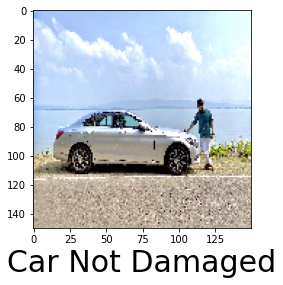

Tanush:input
Bot: Enter the name of your image. If you don't want to upload an image please enter exit.sample_damaged_2.jpg
[[0.]]


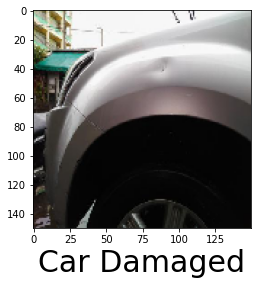

Tanush:input
Bot: Enter the name of your image. If you don't want to upload an image please enter exit.kbkjbvrwj
Bot: Invalid image name entered. Please try again.
Bot: Enter the name of your image. If you don't want to upload an image please enter exit.exit
Bot: How can I be of service?
Tanush:webfobgowrg
Bot:  I am sorry, I do not understand. I am still learning. Please contact abc@xxx.com for further assistance.
Tanush:Give me the contact details of your company in Washington DC
Bot:  Sure. The contact details are: Ph no. 2028987656, Address: 1221, Dupont Circle, Washington DC
Tanush:Contact details of DC office
Bot:  Sure. The contact details are: Ph no. 2028987656, Address: 1221, Dupont Circle, Washington DC
Tanush:Minimum coverage of your insurance
Bot:  $100,000. Costs are determined by the amount of damage and various other factors
Tanush:What are your payment options
Bot:  We have multiple payment options available. You can choose monthly, annual and even semi annual payments.

In [ ]:
inoname = input('Enter Your Name: ')
print ('Welcome to Chatbot Service! Let me know how can I help you')
chatbot_talk()
